## Notebook MLP model for MNIST classification

In this notebook we are going to train a neural network to classify digits.


In [0]:
%tensorflow_version 2.x

In [0]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__) #  check what version of TF is imported

2.2.0-rc3


## Import MNIST data
We obtain the MNIST data set directly through `Keras`, given a fully labelled training and test sets. Loading the dataset returns four `NumPy` arrays.

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


Each example is an image of 28x28 pixels, given as integer grayscale values from 0 to 255. Each example has a label, an integer 0 to 9. `x_train` and `y_train` are the training data containing 60,000 samples, which the model uses to learn. `x_test` and `y_test` form the test set of 10,000 samples, which we use to evaluate the model performance.

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


We can use `matplotlib` to quickly visualise some of the data.

In [0]:
def plot_digit(example_id, X, Y):
  example = X[example_id].reshape(width, height)
  label = Y[example_id]
  print("Class label:", label)
  plt.matshow(example, cmap="gray")
  plt.show();

In [7]:
np.random.seed(13) # set seed such that np.random.choice always returns same index
random_index = np.random.choice(len(x_test), 1)
random_index

array([338])

In [8]:
width, height = x_train.shape[1], x_train.shape[2]
width, height

(28, 28)

Class label: [8]


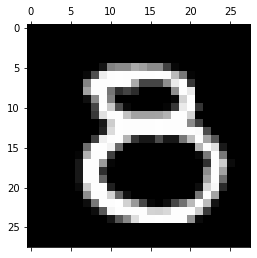

In [9]:
plot_digit(random_index, x_test, y_test) # plot random image from the test dataset

* The pixel values are given by integer values from 0 to 255, we normalise this to obtain float values from 0 to 1.
* Labels are given as values 0 to 9, but here we need so-called "one-hot" encodings, e.g. 3 becomes [0,0,0,1,0,0,0,0,0,0]

In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# normalise data
x_train /= 255 
x_test /= 255

n_classes = 10

# convert labels to one-hot encodings
y_train = to_categorical(y_train, n_classes) 
y_test = to_categorical(y_test, n_classes)

Observe how the shapes of the labels have changed.

In [11]:
print(y_train.shape)
print(y_test.shape)
print("example one-hot encoding:", y_train[0])

(60000, 10)
(10000, 10)
example one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Model architecture & settings

We build an MLP with two hidden layers, with the given number of hidden units. We also include Dropout for each of the layers, with the given dropout rate.

In [0]:
intermediate_dim1 = 256
intermediate_dim2 = 128
dropout_rate = 0.2

* Initialise a Keras Sequential model
* Add a Flatten layer, which transforms the format of the images from a two dimensional array (28,28) to a one dimensional array of 28*28 = 784 elements. Dense layers (which we add after this Flatten layer) expect the data to be given as vectors, not matrices. The first layer  (i.e. the Flatten layer in this model) must explicitly receive the shape of the input (`width`, `height`) , following layers can do automatice shape inference.
* Add two hidden (Dense) layers with ReLU activations and dropout, then a (Dense) Softmax layer with 10 classes (to obtain classification predictions summing up to 1). 
* Compile the model with the following settings:
    * use stochastic gradient descent with the "adadelta" optimizer to train the model
    * MNIST is a multi-class classification problem, use categorical cross entropy loss function
    * output accuracy (% of correctly classified instances) when evaluating the model

    

In [0]:
# TODO implement model here
model = ...

We can use `Keras.utils.plot_model` to visualize the architecture of the model. This is very useful if you want to see an overview of the input and output shapes per layer.

In [0]:
plot_model(model, show_shapes = True, show_layer_names=False)

In [0]:
model.summary() # shows the number of parameters in the model

## Training the model

Train the model (using stochastic gradient descent) with given batch size, for given number of epochs. We split 1/12-th of the data (5,000 of the 60,000 samples) as validation data, such that we can use the validation accuracy for hyperparameter tuning.

<b>HINT</b>: To increase training speed of your model, you can use the free available GPU power in Google Colab. Go to `Edit` --> `Notebook Settings` --> select `GPU` under `hardware accelerator`.

Use [keras.Model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) to train the model on the training data. Validate on 1/12th of the data and use the given batch size and number of epochs.

In [0]:
batch_size = 100
epochs = 20

# TODO fit the model on training data
history = ...

The returned `history` object holds a record of the loss values and metric values during training. We will use this object later to plot the loss and accuracy values for each epoch.

# Evaluating the model

We evaluate the model using the test set, obtaining the test loss and accuracy (% examples correctly classified)

Use [keras.Model.evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) to evaluate the model on the test data. Note that `keras.model.evaluate` returns a list, where in this case the first element corresponds to the loss and the second element corresponds to the accuracy of the model on the given test data.

In [0]:
# TODO evaluate on test data
...

print('Test loss: {:.2f}'.format(loss))
print('Test accuracy: {:.2f}'.format(accuracy))

We can use the `history` object to plot the loss and accuracy values for each epoch.

In [0]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show();

In [0]:
plt.plot(history.history['accuracy'], label='loss')
plt.plot(history.history['val_accuracy'], label = 'val_loss')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper right')
plt.show();

## Make predictions

When the model is trained, we can use it to make predictions about some images. We can use [keras.Model.predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) on the model object defined earlier in this notebook. The model expects input as a <i>batch</i>, i.e. the input shape is (batch_size, `width`, `height`). Therefore, even when you want to use a single image to test, we have to reshape the test image to (1,`width`, `height`) before feeding into the network. The model returns an array of size `n_classes` where for each class the model predicts the probability this sample belongs to that class.

In [0]:
# TODO: select one image from the test data and reshape the image to the correct shape (1,width,height) using .reshape from the NumPy library

# TODO: let the model predict one image
predictions = ...
predictions

To see which label has the highest probability, we use `np.argmax` to return the <u>index</u> of the maximum value.

In [0]:
pred_label = np.argmax(predictions[0]) # predicted label
pred_label

We can use the true label to test if the classification of the model is correct.

In [0]:
true_label = np.argmax(y_test[random_index]) # true label
true_label

In [0]:
if pred_label == true_label:
  print('The model correctly classified this sample.')
else:
  print('The model misclassified this sample.')